In [ ]:
# 2.jpg

""" 
Kod dosyası
cats_and_dogs
|->train
    |->cats : kedi resimleri egitim için
    |->dogs : kopek resimleri egitim için
|->validation
    |->cats : kedi resimleri dogrulama için
    |->dogs : kedi resimleri dogrulama için
"""


In [ ]:
# unzipping böyle yapılıyor ve data klasor'ünün altında
#!unzip cats_and_dogs.zip

In [ ]:
# deleting folders.
# %rm -rf <data> # işe yaramıyor silmiyor

In [3]:
# 3.jpg
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from glob import glob
import cv2

# What is import glob?
# glob (short for global) is used to return all file paths that match a specific pattern. 
# We can use glob to search for a specific file pattern, or perhaps more usefully, 
# search for files where the filename matches a certain pattern by using wildcard characters.


In [4]:
# 3.jpg
# burada ko dosyası ile aynı dizinde olan bir klasor var
# adı : cats_and dogs. Bunun içinde iki tane klasor var
# adlarıı train ve validation.
# her  iki klasorün içinde de sınıf klasorleri var,cats ve dogs.
# cats'in içinde kedi resimleri,dogs'un içinde köpek resimleri var
# bu sayede ekstra bir etiketleme yapmadan bu sınıf adları resimlerin etiketi olacak
# egitim klasorünün dizinini veriyoruz
train_dir = "cats_and_dogs/train"
# dogrulama klasorünün dizinini veriyoruz
# bu dogrulama verisini test verisi olarak düşünebiliriz
# dogru kullanımda ekstra test klasörü de olmalı
# fakat genelde veri ikiye ayrılır. O yuzden ben de böyle yaptım
val_dir = "cats_and_dogs/validation"
# train kalsörü içindeki .jpg uzantılı tüm dosyaların dizinini aldık.
train_images=glob(train_dir+'/*/*.jpg')
# validation klasoru içindeki .jpg uzantılı tüm dosyaların dizinini aldık
val_images = glob(val_dir+'/*/*.jpg') # cats_and_dogs/validation/cat ve dogs folderları var, /*/* herhalde her ikisinide kapsıyor




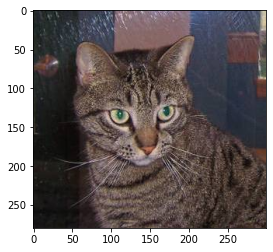

In [ ]:
# 4.jpg
# resimlerin dizinini bir liste seklinde almıstık
# burada bu listenin rastgele bir dizin alıyoruz
pred_image_name=np.random.choice(train_images)
# bu rastgele dizini kullanarak rastgele resim yükledik
img=cv2.imread(pred_image_name)
# resim boyutunu 150,150 yaptık
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
# resmi gösteriyoruz.
plt.imshow(img)
#bu kod her seferinde rastgele bir resim gösterir

In [7]:
# 4.jpg
# klasordeki resimleri kullanmak için bunu kullanacagız.
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# burada resim yükleme için bir yapı olusturuyoruz hem egitim hemde dogrulama veriseti için
# buradaki rescale ifadesi her bir resmi yüklerken resmi 255'e bölüyoruz.
# böylece resimler 0 ile 1 arasında olceklendi
train_datagen = ImageDataGenerator( rescale = 1.0/255.0 )
val_datagen = ImageDataGenerator( rescale = 1.0/255.0 )

# ImageDataGenerator : https://www.analyticsvidhya.com/blog/2020/08/image-augmentation-on-the-fly-using-keras-imagedatagenerator/
# What is TF Keras Preprocessing image ImageDataGenerator?
# Keras ImageDataGenerator is a gem! It lets you augment your images in real-time while your model is still training! 
# You can apply any random transformations on each training image as it is passed to the model.
# This will not only make your model robust but will also save up on the overhead memory!

# benim yorumum ise bu dosya train ve validation folderlarının  altında her ikisindede cats ,dogs folderları var 2 şer tane,  bunların içindede kedi ,kopek fotografları var
# bu döndürü saga kaydırıyor gibi işlemler iler fotografları cogaltıyor. 

In [8]:
# 5.jpg
# burada klasorden resim yüklemek için olusturdugumuz yapıyı kullanarak resimleri yüklüyoruz
# train_dir egitim klasörünün adresi
# shuffle ile resimleri rastgele sıra ile yüklüyor.
# batch_size ifadesi aynı anda modele kaç tane veri verecegimizi ifade ediyor.
# bu sayi bilgisayar donanımına göre degişir.Ama 2 'nin katları olmalı target_size verisin boyutu
# class_mode ise binary cünkü iki tane sınıf var
train_generator = train_datagen.flow_from_directory(
    train_dir,
    shuffle=True,
    batch_size=16,
    target_size=[150,150],
    class_mode="binary"   # bir cok class_mode var internette,neden binary dersen:bizde 2 tane folder var ,cats ve dogs ,2 tane oldugu için binary dedik easy,accurate.
)
# bunu da uygun sekilde dogrulama verileri için yapıyoruz
# burada shuffle yapmaya gerek yok
valid_generator = val_datagen.flow_from_directory(
    val_dir,
    batch_size=16,  
    target_size=[150,150],
    class_mode='binary'
)

# Found 2000 images belonging to 2 classes.
# Found 1000 images belonging to 2 classes.

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
train_generator.classes # array([0, 0, 0, ..., 1, 1, 1], dtype=int32) ,2000 tane images ların labellarını 
# altta var labellar görürsün cats class 0 dır ,dogs class 1 dir.


array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [ ]:
valid_generator.class_indices # 

{'cats': 0, 'dogs': 1}

In [ ]:
# 6.jpg
# modeli olusturuyoruz
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(256,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    # iki sınıf oldugu için genelde sigmoid fonksiyonu kullanılır
    # ayrıca tek bir nöron kullanıyoruz ikili sınıflandırma oldugu için
    tf.keras.layers.Dense(1,activation="sigmoid")
])

In [ ]:
# 6.jpg
# ikili sınıflandırma oldugu için loss da buna uygun olmalı
# optimizer olarak da RMSProp kullandık.
# Adam da olurdu fakat benim veride RMSProp daha iyi calıştı
model.compile(optimizer='RMSProp',
              loss='binary_crossentropy',
              metrics=['accuracy']
              )

In [ ]:
# 7.jpg
# normalde burada x_train ve y_train diyorduk.fakat train_generator bu isi goruyor
# validation içinde valid_generator
r = model.fit(train_generator,
              validation_data=valid_generator,
              epochs=1 ) # hoca 10 yazdı ama ben hızlı olsun diye 1 yazdım

32/32 [==============================] - 230s 7s/step - loss: 1.4420 - accuracy: 0.4970 - val_loss: 0.6901 - val_accuracy: 0.5360


In [ ]:
# 7.jpg
# modelin dogrulama verisi uzerindeki basarısı
model.evaluate(valid_generator) 

16/16 [==============================] - 30s 2s/step - loss: 0.6901 - accuracy: 0.5360


[0.6901416182518005, 0.5360000133514404]

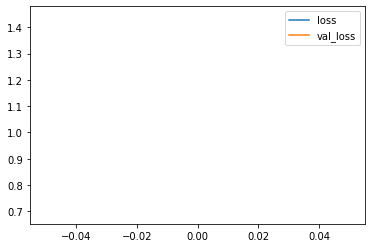

In [ ]:
# 7.jpg
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

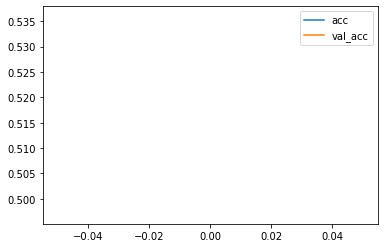

In [ ]:
# 7.jpg
plt.plot(r.history['accuracy'],label='acc')
plt.plot(r.history['val_accuracy'],label='val_acc')
plt.legend()

In [18]:
# ders5 5.jpg
# burada etiket adlarını buluyoruz.bunun için val_datagen kullanıyoruz
# train_datagen ise olmaz,cünkü orada data augmentation yaptık
# o yüzden onu kullanmaya gerek yok

train_dir = "cats_and_dogs/train"
val_dir = "cats_and_dogs/validation"
train_images=glob(train_dir+'/*/*.jpg')
val_images = glob(val_dir+'/*/*.jpg')

val_datagen = ImageDataGenerator( rescale = 1.0/255.0 ) # yukarda var ama üstünde olsun diye yazdım
test_gen = val_datagen.flow_from_directory(val_dir,target_size=[224,224])
# burada etiketleri(sınıfları) yazdırıyoruz.Ayrıca hangi etikete hangi sayının atandıgı da gözüküyor
print(test_gen.class_indices)
# burada bos bir liste olusturuyoruz eleman sayısı ise etiket sayısı kadar
labels =[None] * len(test_gen.class_indices)
# burada v indis, k ise etiket
i=0
for k,v in test_gen.class_indices.items():
  # sırayla etiketleri bu listeye ekliyoruz
  labels[v] = k
  
  #print("labels[",v,"] :",labels[v]," and k :",k) # merak ettim ne vericek diye,
  # şimdi her bir fotonun karsısına cats veya dogs veriyor.
  #if i!=5:
  #  i=i+1
  #  continue
  #break
# bu islem kendimiz etiketleri labels'in içine yazabiliriz
# ama burada sıra önemli dogru sırayı bulamayabiliriz. 
#  kendicem if i!=5: felan ekledim ne veriyor görmek için bu alttakileri verdi
# Found 1000 images belonging to 2 classes.
# {'cats': 0, 'dogs': 1}
# labels[ 0 ] : cats  and k : cats
# labels[ 1 ] : dogs  and k : dogs

#Found 1000 images belonging to 2 classes.
#{'cats': 0, 'dogs': 1}

Found 1000 images belonging to 2 classes.
{'cats': 0, 'dogs': 1}


In [ ]:
for i in range(2):  
  #  ders5 9.jpg
  # burada rastegele bir dogrulama resmi secip modele bunu tahmin ettirip resmi cizdiriyoruz
  # burada lsiteden rastgele bir resim dizini aldık
  pred_image_name =np.random.choice(val_images)
  # bu rastgele dizini kullanarak rastgele bir resim yükledik
  img =cv2.imread(pred_image_name)
  # resmi modele uygun boyuta getirdik
  img=cv2.resize(img,(150,150))
  # opencvdeki resimleri bgr uzayında  bunu rgb uzayını dönüştürdük
  img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  # modele verilecek resim 4 boyutlu olmalı
  # bu boyut batch size'i temsil ediyor
  # burada resme ekstra bir boyut ekledik
  tensor_image = np.expand_dims(img,axis=0)
  # modele tahmin yaptırdık
  prediction = model.predict(tensor_image)
  print("prediction : ",prediction,prediction[0][0]) # prediction :  [[0.]] 0.0  ,prediction :  [[1.4271238e-08]] 1.4271238e-08
  if np.round(prediction[0][0]) <= 0.4:
    prediction=0
  else:
    prediction=1
  # bu tahminden en yüksek degere sahip sınıfın indisini aldık
  #prediction1=np.argmax(prediction) # sigmoid oldugu için prediction:[[0.]] böyle alırsın anlamsız 1 tane value var zaten.
  print("cat=0 and dogs=1 dur,indis==prediction : ",prediction) # bu indis bize 0 yada 1  veriyor ,yani cats or dogs, 2 class var ya,yada 2 label var cats and dogs 
  # tahminin hangi etikete ait oldugunu ögrendik
  

  # yukardaki calışmadı bende kendimce yaptım label olayını
  # cünkü sigmoid kullandık,sigmoid 2 ve altında sayıda class oldugunda daha verimli oldugu için kullanılır
  # softmax kullansaydık böyle bir sorun olmazdı argmax ile alırdık en yüksek sayıya sahip indis'i.
  #if(np.round(prediction)==1):
  #  prediction1=1
  #else:
  #  prediction1=0

  tahmin=labels[prediction]
  # resmin indisini yazıyoruz,burası karısık olsada hangi sınıfa ait oldugunu da yazıyor
  print('Gercek etiker : ',pred_image_name)
  # modelin hangi etiketi tahmi ettigini yazdırıyoruz
  print("modelin tahmini : ",tahmin)
  #plt.imshow(img)

# tam dogru degil ama eh işte.
# prediction :  [[3.946156e-37]] 3.946156e-37
# cat=0 and dogs=1 dur,indis==prediction :  0
# Gercek etiker :  cats_and_dogs/validation/dogs/dog.2071.jpg
# modelin tahmini :  cats

In [ ]:
#model.save("cats_and_dogs_saved.h5") # bunun amacı sequential da  yaptıgın modeli kaydetmek için 
#model1 = tf.keras.models.load_model('cats_and_dogs_saved.h5')
#model.evaluate(valid_generator) #  gibi düşün modeli aldın direk sonra test imageslarını verdin evaluate yaptın ,istersen sonrasında
# predict yapıp karşılaştırma yaparsın.


In [ ]:
# peki biz dataset'i nasıl kayıt eder sonra alırız ?
#bu yontem ile

#egitilmiş modeli kayıt eder.
fer_json = model.to_json()
with open("cats_and_dogs_labels.json", "w") as json_file:  # bize labelları oldugu json formatında verir classları
    json_file.write(fer_json)
model.save_weights("cats_and_dogs_weights.h5") #modelin agırlıklarını verir.


prediction[[]] and extracted: [[0.63409543]] 0.63409543
cat=0 and dogs=1 dur,indis==prediction :  1
Gercek etiker :  cats_and_dogs/validation/cats/cat.2137.jpg
modelin tahmini :  dogs


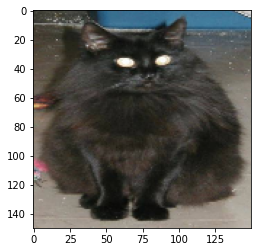

prediction[[]] and extracted: [[0.9762006]] 0.9762006
cat=0 and dogs=1 dur,indis==prediction :  1
Gercek etiker :  cats_and_dogs/validation/cats/cat.2262.jpg
modelin tahmini :  dogs


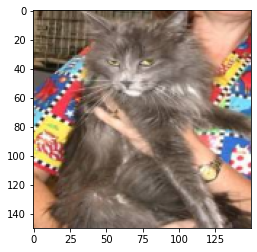

In [27]:
# burda kayıt ettigimiz modeli aldık test ettik,  .json ve .h5 isimli leri aldık ve calıştı
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from glob import glob
import cv2
from keras.models import model_from_json

model_new = model_from_json(open("cats_and_dogs_labels.json", "r").read())
model_new.load_weights('cats_and_dogs_weights.h5')
for i in range(2):
  pred_image_name =np.random.choice(val_images)
  img =cv2.imread(pred_image_name)
  img=cv2.resize(img,(150,150))
  img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  tensor_image = np.expand_dims(img,axis=0)
  prediction = model_new.predict(tensor_image)

  print("prediction[[]] and extracted:",prediction,prediction[0][0]) # prediction :  [[0.]] 0.0  ,prediction :  [[1.4271238e-08]] 1.4271238e-08
  if np.round(prediction[0][0]) <= 0.4:
    prediction=0
  else:
    prediction=1

  print("cat=0 and dogs=1 dur,indis==prediction : ",prediction) # bu indis bize 0 yada 1  veriyor ,yani cats or dogs, 2 class var ya,yada 2 label var cats and dogs 

  tahmin=labels[prediction]
  print('Gercek etiker : ',pred_image_name)
  print("modelin tahmini : ",tahmin)
  plt.imshow(img)
  plt.show()

In [ ]:

 # axis=0 ,axis=1 in argmax in ne oldugunu anlamak için koydum
# Python Program illustrating
# working of argmax()
 
import numpy as geek
 
# Working on 2D array
array =  geek.random.randint(16, size=(4, 4))
print("INPUT ARRAY : \n", array)
 
# No axis mentioned, so works on entire array
print("\nMax element : ", geek.argmax(array))
 
# returning Indices of the max element
# as per the indices
 
'''  
   [[ 0  3  8 13]
    [12 11  2 11]
    [ 5 13  8  3]
    [12 15  3  4]]
      ^  ^  ^  ^
     12 15  8  13  - element
     1  3   0  0   - indices
'''
 #axis 1 dediginde vertical bakar
print("\nIndices of Max element : ", geek.argmax(array, axis = 0))
 
 
'''  
                            ELEMENT   INDEX
   ->[[ 0  3  8 13]           13        3
    ->[12 11  2 11]           12        0
    ->[ 5 13  8  3]           13        1
    ->[12 15  3  4]]          15        1
       
'''
#axis 0 dediginde horizontal bakar
print("\nIndices of Max element : ", geek.argmax(array, axis = 1))
 
"""
Output : 

INPUT ARRAY : 
 [[ 0  3  8 13]
  [12 11  2 11]
  [ 5 13  8  3]
  [12 15  3  4]]

Max element :  15

Indices of Max element :  [1 3 0 0]

Indices of Max element :  [3 0 1 1]

"""

INPUT ARRAY : 
 [[11  3 14  1]
 [ 5 10  7  2]
 [15 11  2  2]
 [ 5  4 10  2]]

Max element :  8

Indices of Max element :  [2 2 0 1]

Indices of Max element :  [2 1 0 2]


'\nOutput : \n\nINPUT ARRAY : \n [[ 0  3  8 13]\n  [12 11  2 11]\n  [ 5 13  8  3]\n  [12 15  3  4]]\n\nMax element :  15\n\nIndices of Max element :  [1 3 0 0]\n\nIndices of Max element :  [3 0 1 1]\n\n'